# Problem Statment
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

The solution is divided into the following sections:

    Data understanding and exploration
    Data cleaning
    Data preparation
    Model building and evaluation


# 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [106]:
# reading the dataset
hotel = pd.read_csv("hotel_bookings.csv")

In [107]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [108]:
print(hotel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

#### Understanding the Data Dictionary

Data quality check

In [109]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Data Cleaning

In [110]:
#Since 'company' has 112593 null values we shall drop cloumn company
hotel = hotel.drop(['company'], axis = 1)
hotel = hotel.dropna(axis = 0)


In [111]:
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [112]:
#lets check for unique values in each columns
hotel['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [113]:
#Since there are only two values in column 'hotel' we shall map Resort Hotel=0 and City Hotel=1
hotel['hotel'] = hotel['hotel'].map({'Resort Hotel':0, 'City Hotel':1})
hotel['hotel'].unique()

array([0, 1], dtype=int64)

In [114]:
hotel['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [115]:
hotel['arrival_date_month'] = hotel['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
hotel['arrival_date_month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6], dtype=int64)

Text(0, 0.5, 'Frequency')

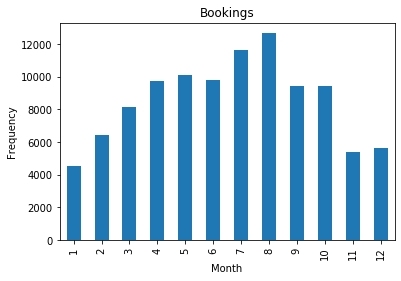

In [116]:
count_classes = pd.value_counts(hotel['arrival_date_month'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Month")
plt.ylabel("Frequency")

As seen from the above graph we can see that more arrivals in the month of 'August'

[]

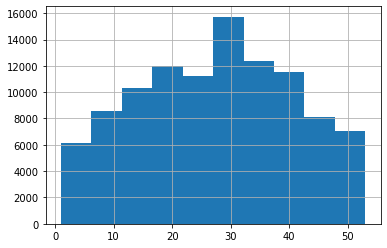

In [117]:
hotel['arrival_date_week_number'].hist()
plt.plot()

AS seen from above graph, there is more demand from week 28 to week 32

[]

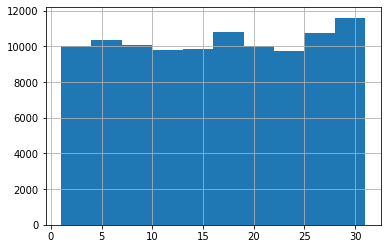

In [118]:
hotel['arrival_date_day_of_month'].hist()
plt.plot()

AS seen from above graph, there is more demand at the end of the month.

Text(0, 0.5, 'Frequency')

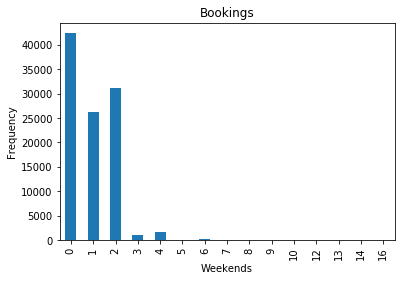

In [119]:
count_classes = pd.value_counts(hotel['stays_in_weekend_nights'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Weekends")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

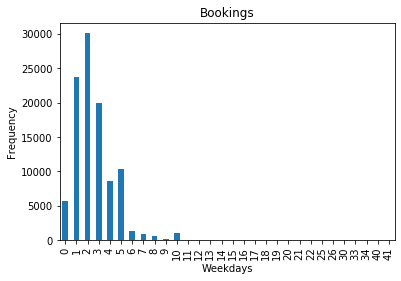

In [120]:
count_classes = pd.value_counts(hotel['stays_in_week_nights'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Weekdays")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

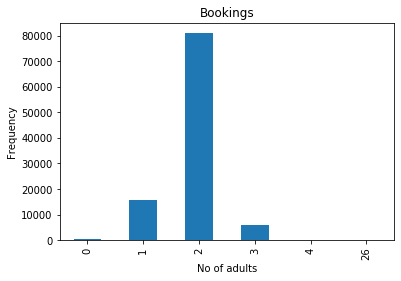

In [121]:
count_classes = pd.value_counts(hotel['adults'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("No of adults")
plt.ylabel("Frequency")

from the above graph we can see that mostly 2 adults do maximum booking

Text(0, 0.5, 'Frequency')

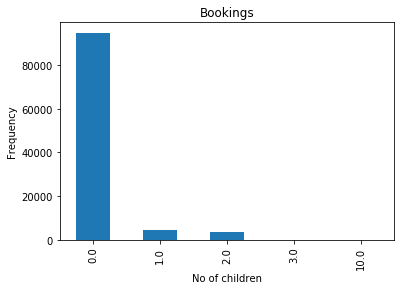

In [122]:
count_classes = pd.value_counts(hotel['children'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("No of children")
plt.ylabel("Frequency")

From the plot we can make out that mostly couples do bookings with no childern.

Text(0, 0.5, 'Frequency')

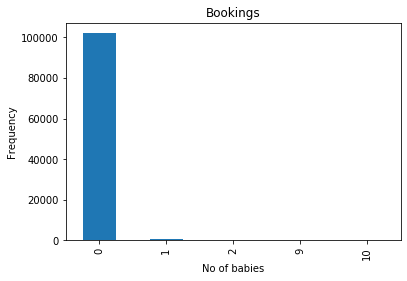

In [123]:
count_classes = pd.value_counts(hotel['babies'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("No of babies")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

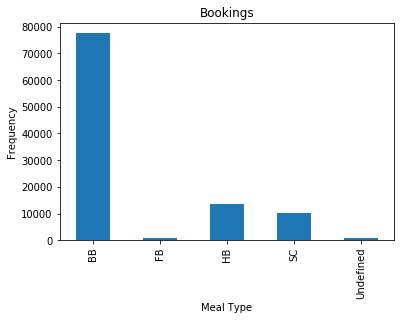

In [124]:
count_classes = pd.value_counts(hotel['meal'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Meal Type")
plt.ylabel("Frequency")

From the above plot we can see that most of them prefer Bed & Breakfast as a package

Text(0, 0.5, 'Frequency')

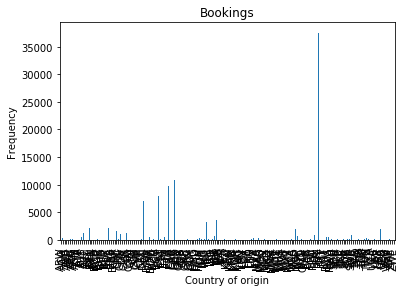

In [129]:
count_classes = pd.value_counts(hotel['country'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Country of origin")
plt.ylabel("Frequency")

In [128]:
hotel['country'].value_counts()

PRT    37591
GBR    10889
FRA     9810
ESP     7848
DEU     6998
       ...  
MWI        1
CYM        1
BHS        1
SDN        1
DMA        1
Name: country, Length: 174, dtype: int64

Text(0, 0.5, 'Frequency')

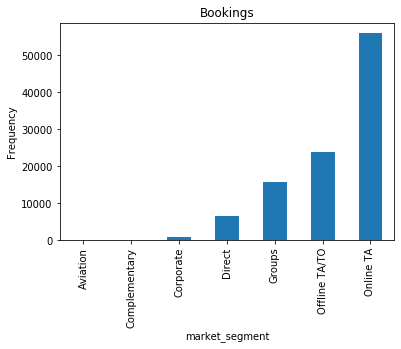

In [130]:
count_classes = pd.value_counts(hotel['market_segment'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("market_segment")
plt.ylabel("Frequency")

The bookings are mostly done by online travle agents

Text(0, 0.5, 'Frequency')

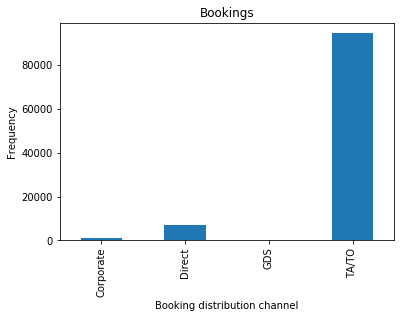

In [132]:
count_classes = pd.value_counts(hotel['distribution_channel'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Booking distribution channel")
plt.ylabel("Frequency")

The bookings are mostly done by online travle agents/ travel operators, direct booking is 2nd highest and 3rd highest is corporate bookings

Text(0, 0.5, 'Frequency')

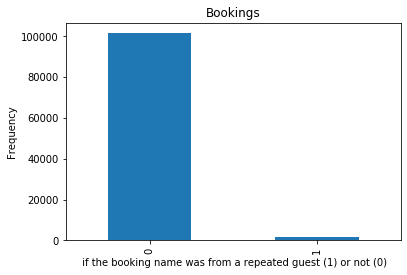

In [133]:
count_classes = pd.value_counts(hotel['is_repeated_guest'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel(" if the booking name was from a repeated guest (1) or not (0)")
plt.ylabel("Frequency")

The plot clearly tells us that the booking is from new guest and not a repeated customer

Text(0, 0.5, 'Frequency')

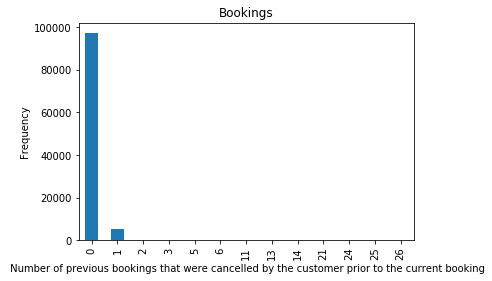

In [134]:
count_classes = pd.value_counts(hotel['previous_cancellations'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel(" Number of previous bookings that were cancelled by the customer prior to the current booking")
plt.ylabel("Frequency")

Not much cancelations done prior to the current booking

Text(0, 0.5, 'Frequency')

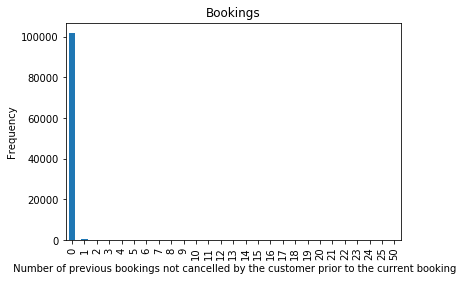

In [136]:
count_classes = pd.value_counts(hotel['previous_bookings_not_canceled'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel(" Number of previous bookings not cancelled by the customer prior to the current booking")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

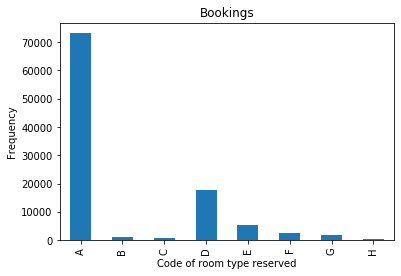

In [137]:
count_classes = pd.value_counts(hotel['reserved_room_type'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Code of room type reserved")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

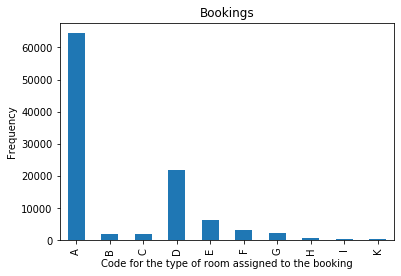

In [138]:
count_classes = pd.value_counts(hotel['assigned_room_type'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Code for the type of room assigned to the booking")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

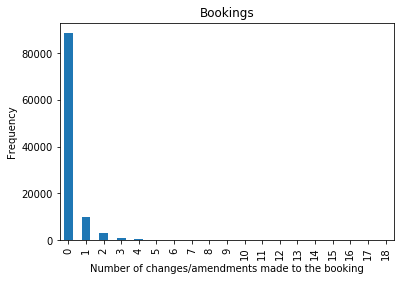

In [139]:
count_classes = pd.value_counts(hotel['booking_changes'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Number of changes/amendments made to the booking")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

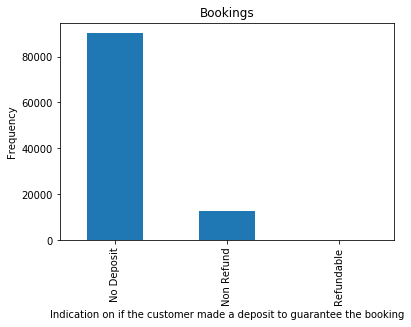

In [140]:
count_classes = pd.value_counts(hotel['deposit_type'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Indication on if the customer made a deposit to guarantee the booking")
plt.ylabel("Frequency")

Most of the bookings are made without any deposit

Text(0, 0.5, 'Frequency')

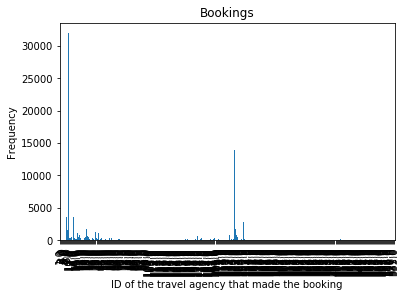

In [141]:
count_classes = pd.value_counts(hotel['agent'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("ID of the travel agency that made the booking")
plt.ylabel("Frequency")

In [142]:
hotel['agent'].value_counts()

9.0      31959
240.0    13871
1.0       7191
14.0      3638
7.0       3539
         ...  
197.0        1
450.0        1
352.0        1
367.0        1
346.0        1
Name: agent, Length: 332, dtype: int64

Agent ID=9 has the maximum bookings done

Text(0, 0.5, 'Frequency')

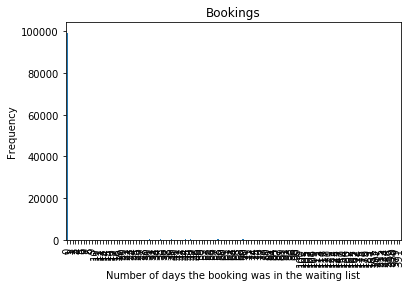

In [145]:
count_classes = pd.value_counts(hotel['days_in_waiting_list'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Number of days the booking was in the waiting list")
plt.ylabel("Frequency")

In [146]:
hotel['days_in_waiting_list'].value_counts()

0      99355
39       226
58       164
44       140
31       107
       ...  
92         1
81         1
52         1
116        1
89         1
Name: days_in_waiting_list, Length: 122, dtype: int64

Text(0, 0.5, 'Frequency')

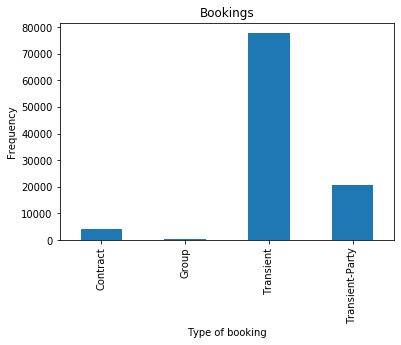

In [149]:
count_classes = pd.value_counts(hotel['customer_type'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Type of booking")
plt.ylabel("Frequency")

Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;

[]

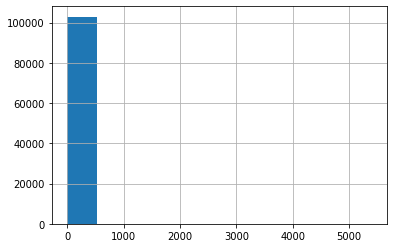

In [152]:
hotel['adr'].hist()
plt.plot()

Text(0, 0.5, 'Frequency')

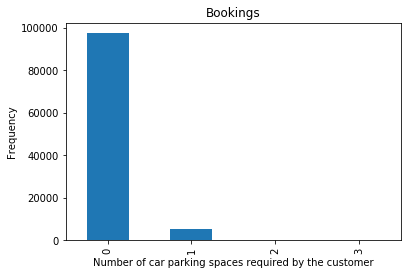

In [151]:
count_classes = pd.value_counts(hotel['required_car_parking_spaces'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Number of car parking spaces required by the customer")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

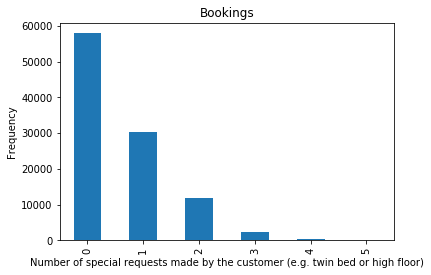

In [153]:
count_classes = pd.value_counts(hotel['total_of_special_requests'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Number of special requests made by the customer (e.g. twin bed or high floor)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

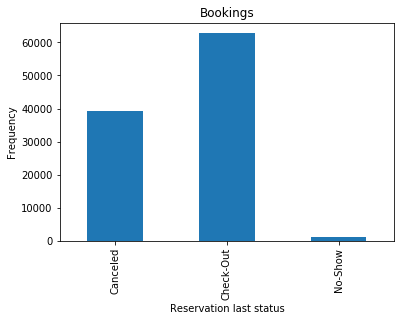

In [154]:
count_classes = pd.value_counts(hotel['reservation_status'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Reservation last status")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

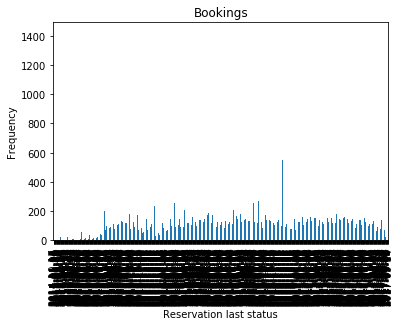

In [156]:
count_classes = pd.value_counts(hotel['reservation_status_date'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Bookings")
plt.xlabel("Reservation last status")
plt.ylabel("Frequency")

### Outlier Treatment

In [157]:
def remove_oulier(df):
    outliers = {}
    for col in df.columns:
        if str(df[col].dtype)!= 'object':
            df = df[np.abs(df[col]-df[col].mean()) < (3*df[col].std())]
            olrs = df[~(np.abs(df[col]-df[col].mean()) < (3*df[col].std()))]
            outliers = pd.DataFrame(olrs)
    return df, outliers
    

In [158]:
remove_oulier(hotel)

(        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
 3           0            0         13               2015                   7   
 4           0            0         14               2015                   7   
 5           0            0         14               2015                   7   
 7           0            0          9               2015                   7   
 8           0            1         85               2015                   7   
 ...       ...          ...        ...                ...                 ...   
 119384      1            0         21               2017                   8   
 119385      1            0         23               2017                   8   
 119386      1            0        102               2017                   8   
 119388      1            0        109               2017                   8   
 119389      1            0        205               2017                   8   
 
         arrival_date_week

# Label Encoder

In [159]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column. 
hotel['customer_type']= label_encoder.fit_transform(hotel['customer_type']) 
hotel['assigned_room_type'] = label_encoder.fit_transform(hotel['assigned_room_type'])
hotel['deposit_type'] = label_encoder.fit_transform(hotel['deposit_type'])
hotel['reservation_status'] = label_encoder.fit_transform(hotel['reservation_status'])
hotel['meal'] = label_encoder.fit_transform(hotel['meal'])
hotel['country'] = label_encoder.fit_transform(hotel['country'])
hotel['distribution_channel'] = label_encoder.fit_transform(hotel['distribution_channel'])
hotel['market_segment'] = label_encoder.fit_transform(hotel['market_segment'])
hotel['reserved_room_type'] = label_encoder.fit_transform(hotel['reserved_room_type'])
hotel['reservation_status_date'] = label_encoder.fit_transform(hotel['reservation_status_date'])


Text(0.5, 1, 'Correlation between different fearures')

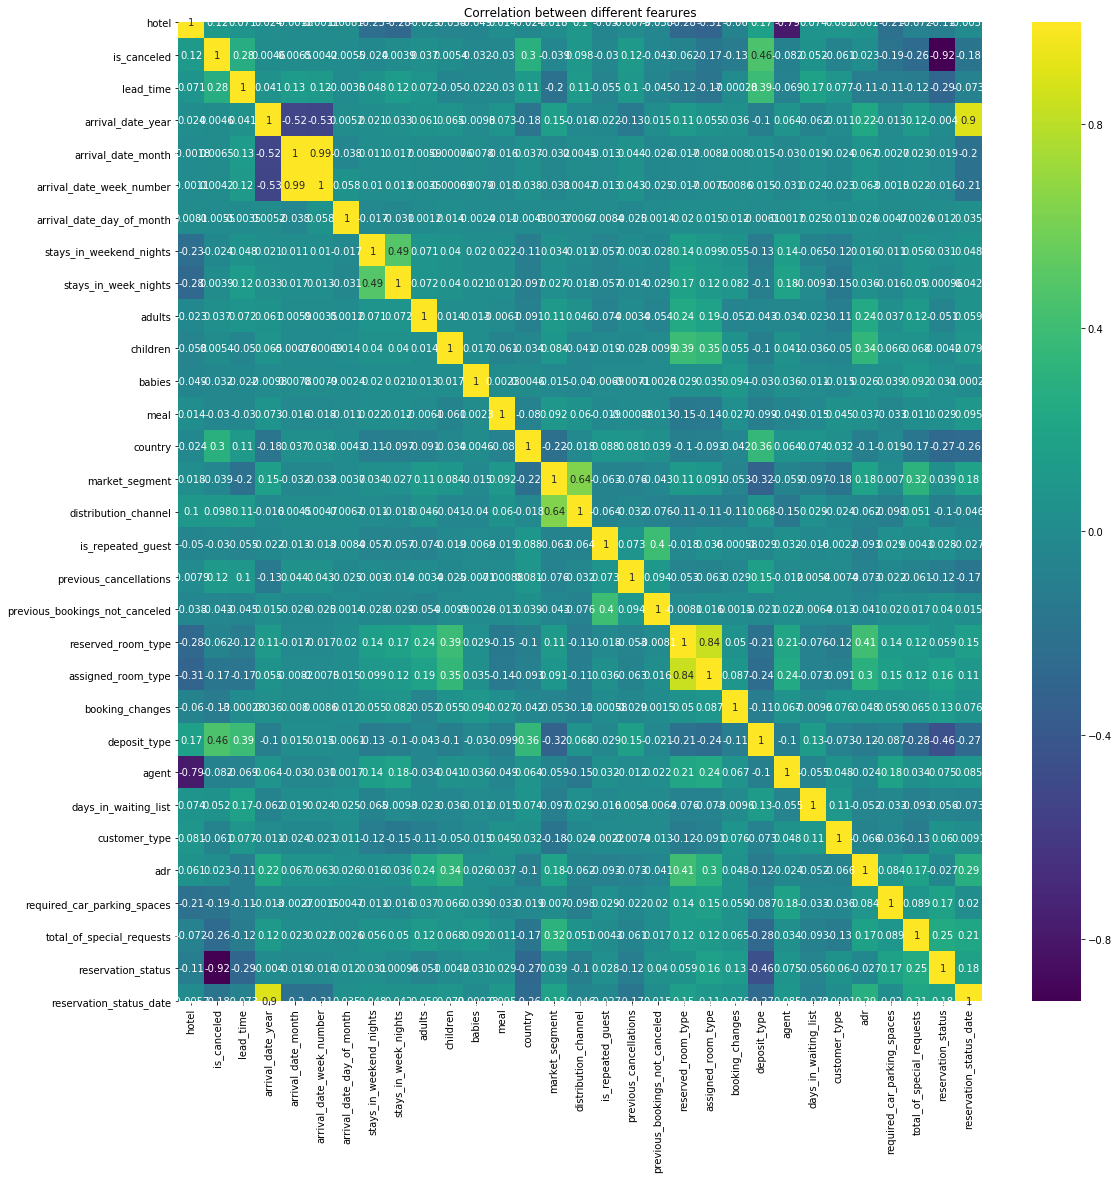

In [160]:
correlation = hotel.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

Look at the correlation of each column compared to the other one. We do not see any two variables are very closely correlated.

# Model building and evaluation

In [161]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor

In [162]:
X = hotel.drop(['previous_cancellations'], axis = 1)
y = hotel['previous_cancellations']

The target variable is 'previous_cancellations' hence keeoing it in 'y'  and dropiing 'previous_cancellations' kepping all other variables in 'X'

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)

print('Mean Absolute Error_lng:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_lng:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_lng:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_lng:', r2_score(y_test, y_pred).round(3))

Mean Absolute Error_lng: 0.172
Mean Squared Error_lng: 0.636
Root Mean Squared Error_lng: 0.798
r2_score_lng: 0.065


In [164]:
y_train_imbalance = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imbalance = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imbalance))
print("Imbalance in Test Data: {}".format(y_test_imbalance))

Imbalance in Train Data: 0.056983945290716445
Imbalance in Test Data: 0.057266157481933075


In [166]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train) #training the algorithm

y_pred = ridge.predict(X_test)

print('Mean Absolute Error_ridge:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_ridge:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_ridge:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_ridge:', r2_score(y_test, y_pred).round(3))

Mean Absolute Error_ridge: 0.172
Mean Squared Error_ridge: 0.636
Root Mean Squared Error_ridge: 0.798
r2_score_ridge: 0.065


In [167]:
clf = Lasso(alpha=0.1)

clf.fit(X_train, y_train) #training the algorithm

y_pred = clf.predict(X_test)

print('Mean Absolute Error_lasso:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_lasso:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_lasso:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_lasso:', r2_score(y_test, y_pred).round(3))

Mean Absolute Error_lasso: 0.17
Mean Squared Error_lasso: 0.656
Root Mean Squared Error_lasso: 0.81
r2_score_lasso: 0.036


In [168]:
logreg = LogisticRegression(solver = 'lbfgs')
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

print('Mean Absolute Error_logreg:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_logreg:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_logreg:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_logreg:', r2_score(y_test, y_pred).round(3))

Mean Absolute Error_logreg: 0.06
Mean Squared Error_logreg: 0.633
Root Mean Squared Error_logreg: 0.795
r2_score_logreg: 0.07


In [169]:
# Ridge Regression with Gridsearch ##
from sklearn.model_selection import GridSearchCV

parameters= {'alpha':[50,75,100,200, 230, 250], 'random_state':[5,10,20,50,], 'max_iter':[0.1,0.5,1,2,3,5]}

grid = GridSearchCV(ridge, parameters, cv=5)
grid.fit(X_train, y_train)
print ("Best_Score_Ridge : ", grid.best_score_)
print('best_para_Ridge:', grid.best_params_)

Best_Score_Ridge :  0.07019788802014862
best_para_Ridge: {'alpha': 50, 'max_iter': 0.1, 'random_state': 5}


In [170]:
# Lasso Regression with Gridsearch ##
from sklearn.model_selection import GridSearchCV

parameters= {'alpha':[200, 230, 250,265, 270, 275, 290, 300], 'random_state':[2,5,10,20,50,], 'max_iter':[5,10,15,20,30,50,100]}

grid = GridSearchCV(clf, parameters, cv=5)
grid.fit(X_train, y_train)
print ("Best_Score_Lasso : ", grid.best_score_)
print('best_para_Lasso:', grid.best_params_)

Best_Score_Lasso :  -0.00017179748368758573
best_para_Lasso: {'alpha': 200, 'max_iter': 5, 'random_state': 2}


In [171]:
 # create regressor object 
rfe = RandomForestRegressor(n_estimators = 100, random_state = 42) 
  
# fit the regressor with x and y data 
rfe.fit(X, y)   
y_pred=rfe.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score_RFE:', r2_score(y_test, y_pred).round(3))

Mean Absolute Error: 0.0036937754929042155
Mean Squared Error: 0.008122136938712698
Root Mean Squared Error: 0.09012289908071476
r2_score_RFE: 0.988


In [172]:
ABR = AdaBoostRegressor(n_estimators = 100, random_state = 42) 
  
# fit the regressor with x and y data 
ABR.fit(X, y)   
y_pred=ABR.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score_ABR:', r2_score(y_test, y_pred).round(3))

Mean Absolute Error: 0.1336209549318419
Mean Squared Error: 0.14313063460515452
Root Mean Squared Error: 0.3783260955910318
r2_score_ABR: 0.79


In [185]:
X = hotel.drop(['previous_cancellations'], axis = 1)
y = hotel['previous_cancellations']

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [187]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [188]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [191]:
# Establish model
model = RandomForestRegressor(n_jobs=-1)

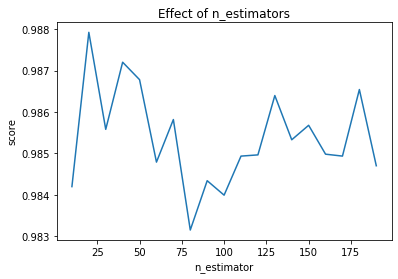

In [192]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [193]:
scores

[0.9841995275736587,
 0.9879206040949507,
 0.9855810347635743,
 0.9872001637712428,
 0.9867791090056928,
 0.9847905312726637,
 0.9858170765652695,
 0.9831528774695906,
 0.9843422013374344,
 0.9839934072879536,
 0.9849354356036168,
 0.9849648169680106,
 0.9863960785614613,
 0.9853292953652565,
 0.9856785758212857,
 0.9849818336013768,
 0.9849355516114628,
 0.9865410792256429,
 0.9847029127014506]